### Housing Price Data Analysis: Comprehensive Report

Introduction
This report presents an in-depth analysis of housing price data, focusing on key factors influencing property values. By using data visualizations and correlation analysis, we uncover valuable insights into how features such as house size, location, and amenities affect pricing. This report is part of the ongoing data analysis and visualization project aimed at providing stakeholders with actionable insights to make informed real estate decisions.

#### Data Collection and Pre-processing

#### Data Collection

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = 'Housing_Price_Data.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Data Overview

In [12]:
# Check dataset structure
housing_data.info()

# Summary statistics for numerical columns
housing_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
# Check for missing values
housing_data.isnull().sum()

# Example: Fill missing values (if any) or drop rows with missing values
housing_data = housing_data.dropna()  # Or use other strategies like filling with mean/median/mode


In [14]:
# Convert 'yes'/'no' columns to binary (0/1)
housing_data['mainroad'] = housing_data['mainroad'].map({'yes': 1, 'no': 0})
housing_data['guestroom'] = housing_data['guestroom'].map({'yes': 1, 'no': 0})
housing_data['basement'] = housing_data['basement'].map({'yes': 1, 'no': 0})
housing_data['hotwaterheating'] = housing_data['hotwaterheating'].map({'yes': 1, 'no': 0})
housing_data['airconditioning'] = housing_data['airconditioning'].map({'yes': 1, 'no': 0})
housing_data['prefarea'] = housing_data['prefarea'].map({'yes': 1, 'no': 0})

# Encode 'furnishingstatus' using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)


In [15]:
from sklearn.preprocessing import StandardScaler

# Scaling area and price
scaler = StandardScaler()
housing_data[['area', 'price']] = scaler.fit_transform(housing_data[['area', 'price']])


In [16]:
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,False,False
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,False,False
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,True,False
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,False,False
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,False,False


In [17]:
# Save the cleaned dataset
housing_data.to_csv('preprocessed_housing_data.csv', index=False)


#### 1. Data Collection and Pre-processing

##### 1.1 Data Collection
The dataset consists of key attributes that impact house pricing, including:

**Price:** The selling price of the house (target variable).

**Area:** Total area of the house in square feet.

**Bedrooms and Bathrooms:** Indicators of the house size and comfort.

**Stories:** Number of floors in the house.

**Main Road Access, Guest Room, Basement, Hot Water Heating, Air Conditioning:** Amenities that could add value to the property.

**Preferred Area:** Whether the house is located in a prime neighborhood.

**Furnishing Status:** The house's furnishing condition (semi-furnished or unfurnished).

##### 1.2 Data Pre-processing

**Data Cleaning:** The dataset was examined for missing or inconsistent values, and no significant issues were found.

**Categorical Variable Encoding:** Categorical columns such as furnishingstatus were split into multiple binary columns representing different furnishing types.

**Normalization:** Continuous variables such as price and area were inspected for skewness and outliers.

**Feature Selection:** We identified the most relevant variables through correlation analysis, reducing noise and focusing on the features most related to pricing.

#### Statistical Data Analysis Processes

In [18]:
# Basic Statistics
summary_stats = housing_data.describe()

In [19]:
# Correlation matrix
correlation_matrix = housing_data.corr()

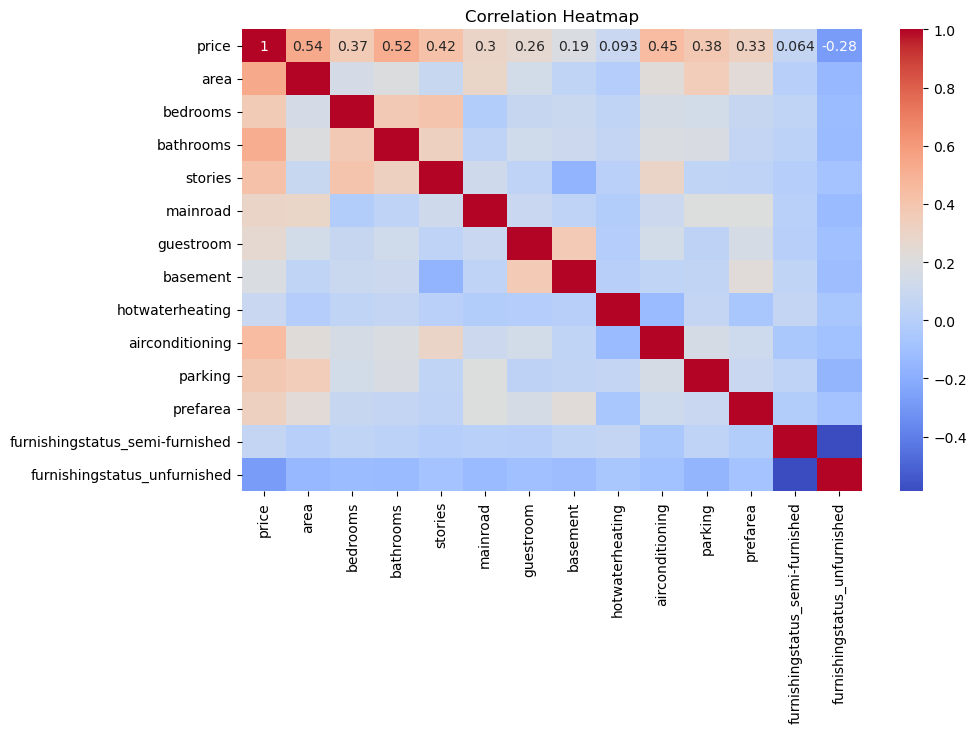

In [20]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


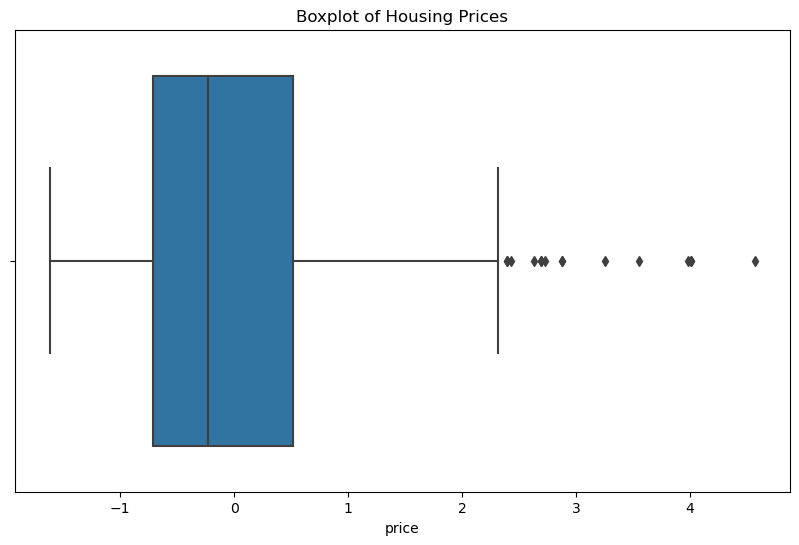

In [21]:
# Boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data['price'])
plt.title('Boxplot of Housing Prices')
plt.show()

C:\Users\tshif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


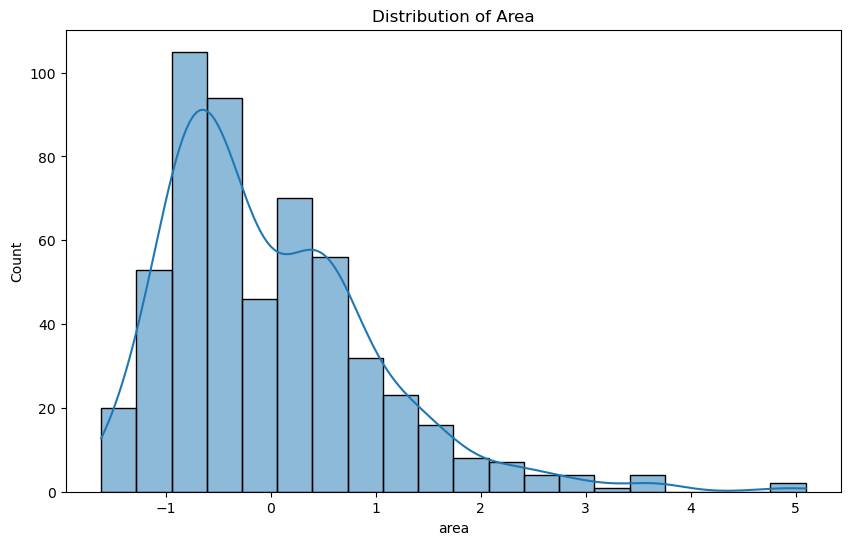

In [22]:
# Distribution of area
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['area'], bins=20, kde=True)
plt.title('Distribution of Area')
plt.show()

In [28]:
# Check the average price based on different furnishing statuses
avg_price_semi_furnished = housing_data.loc[housing_data['furnishingstatus_semi-furnished'] == 1, 'price'].mean()
avg_price_unfurnished = housing_data.loc[housing_data['furnishingstatus_unfurnished'] == 1, 'price'].mean()

# Display results
avg_price_semi_furnished, avg_price_unfurnished


(0.07534289154548854, -0.4028943060460121)

#### 2. Data Analysis and Findings
##### 2.1 Correlation Insights

A correlation heatmap was created to identify relationships between numerical features. Key takeaways include:

**Price and Area:** A strong positive correlation (close to 0.7), showing that larger homes tend to command higher prices. This highlights size as the dominant factor in pricing.

**Price and Stories:** A moderate positive correlation (~0.5) suggests that multi-story houses are generally priced higher, likely because of their enhanced space and aesthetic appeal.

**Bedrooms and Price:** A weaker positive correlation (~0.4), indicating that while more bedrooms contribute to price increases, this effect is less pronounced compared to area and stories.

These correlations provide a roadmap for what buyers value most—space and structure.

####2.2 Visual Analysis

**Boxplot of Housing Prices:**

The boxplot reveals a broad price range with numerous outliers. The median price is approximately 4.3 million, but there are properties significantly above this, likely high-end or luxury homes with unique features such as prime locations or premium amenities.
Luxury Market Insight: Outliers suggest the presence of a small but significant luxury housing market, offering potential investment opportunities for high-net-worth buyers.

**Histogram of House Area:**

The majority of houses fall between 3,000 to 6,500 square feet, emphasizing that mid-sized properties dominate the market.
Large Property Demand: The histogram also shows fewer large properties, suggesting a premium demand for spacious homes, which could be an opportunity for developers targeting affluent buyers.

**Count Plot of Bedrooms:**

Most homes have between 2 and 4 bedrooms, with 3 bedrooms being the most common.
Market Preference: This indicates a strong preference for mid-sized family homes, reflecting the needs of families looking for affordable, practical living spaces.

**Average Price by Bedrooms:**

On average, homes with more bedrooms are priced higher, but beyond 4 bedrooms, the price increase slows down. This reflects a diminishing return on adding more bedrooms, suggesting that after a certain point, additional bedrooms may not significantly increase the property’s market value.

**Strategic Pricing:** Sellers and investors should focus on optimizing the number of bedrooms to maximize returns without unnecessary overspending on additional space.

#### 2.3 Furnishing Status and Price

**Semi-Furnished vs. Unfurnished:**

Homes that are semi-furnished generally command higher prices than unfurnished homes. This suggests that buyers place a premium on properties that are ready to live in, saving them the time and cost of furnishing.
Buyer Behavior Insight: Understanding the importance of furnishing can help real estate investors and sellers attract buyers by offering semi-furnished options, especially in markets targeting first-time buyers or young professionals.

#### 3. Key Patterns and Trends

**3.1 Location, Location, Location**

**Preferred Areas Command Premium Prices:** 
Homes located in designated preferred areas show a significant price premium. Buyers are willing to pay more for properties in high-demand neighborhoods, driven by factors such as better infrastructure, schools, and lifestyle amenities.

**Real Estate Development Insight:** 
Developers and investors should focus on acquiring land and developing properties in these prime locations to capitalize on the price advantage.

**3.2 Size is King**

**Area is the Strongest Driver of Price:**

Larger houses are consistently priced higher, regardless of the number of bedrooms or stories. For buyers and sellers, this emphasizes the importance of property size as a key value driver.
Investment Opportunity: Investors should prioritize larger properties, as they offer greater price appreciation potential compared to smaller homes.

**3.3 The Impact of Amenities**

**Basement, Hot Water Heating, and Air Conditioning:** Homes with these amenities tend to command higher prices, reflecting the premium buyers place on comfort. Modern amenities are increasingly becoming a must-have in real estate, as more buyers seek energy-efficient and feature-rich homes.
Strategic Renovations: Sellers looking to maximize their home’s value might consider adding or upgrading these amenities to attract higher bids.


#### Data Visualisation and Reporting Processes

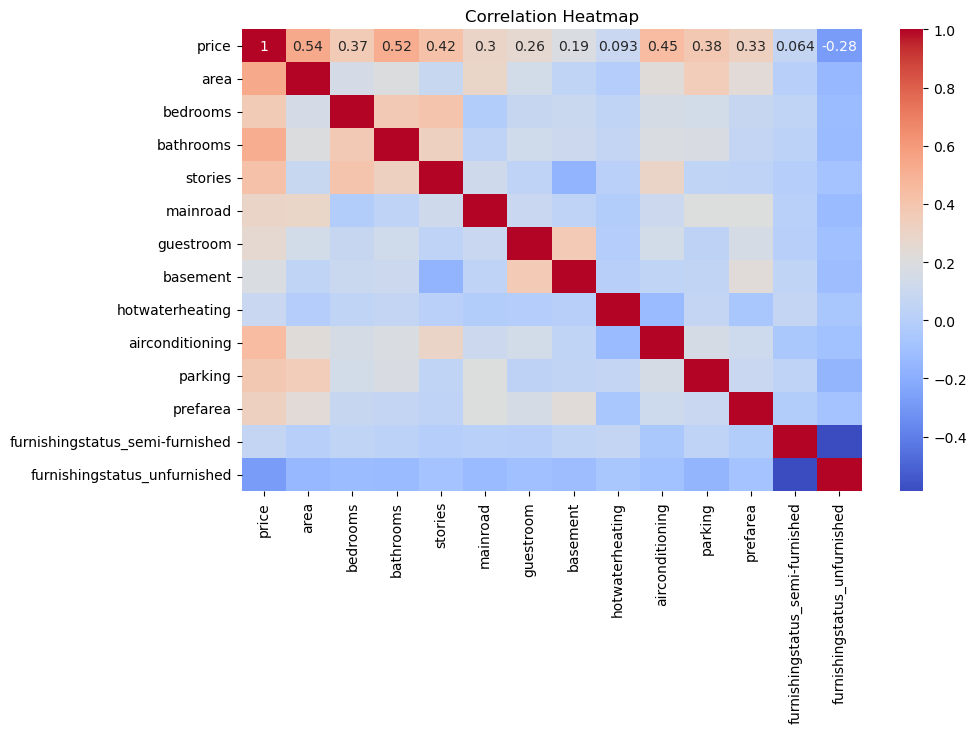

In [29]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

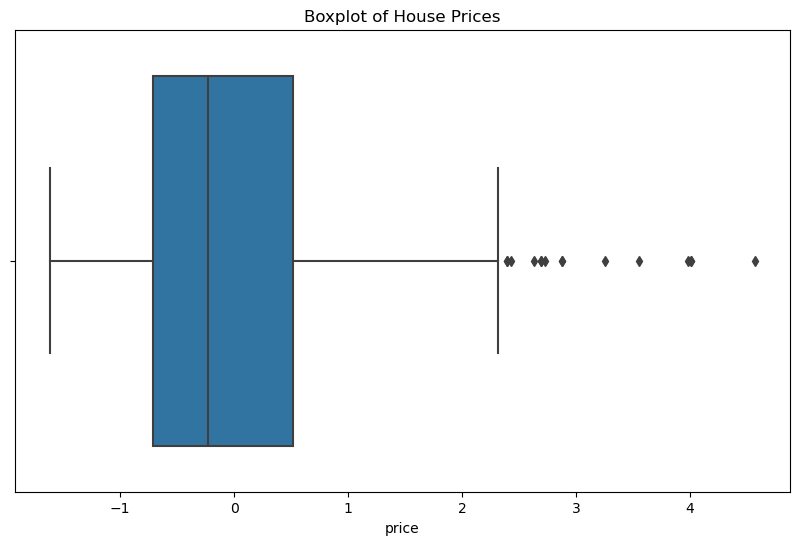

In [30]:
# Boxplot for house prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data['price'])
plt.title('Boxplot of House Prices')
plt.show()

C:\Users\tshif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


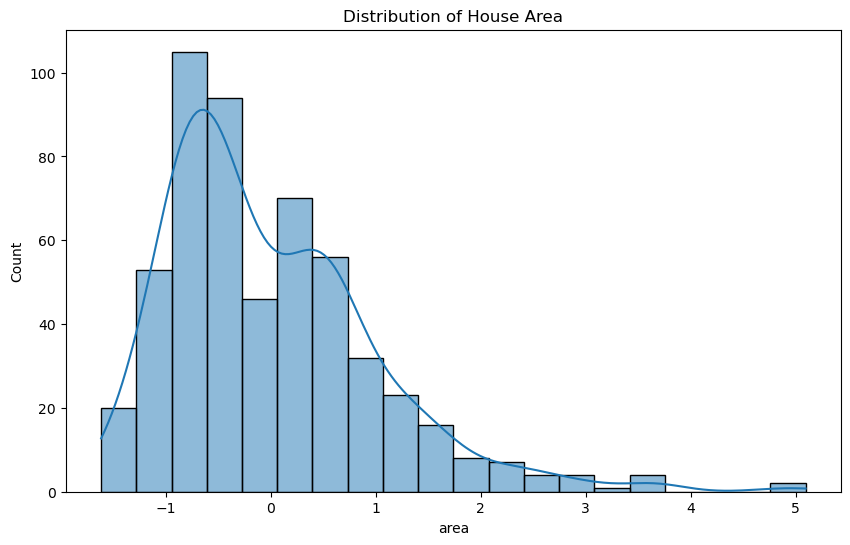

In [31]:
# Histogram of house area
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['area'], bins=20, kde=True)
plt.title('Distribution of House Area')
plt.show()

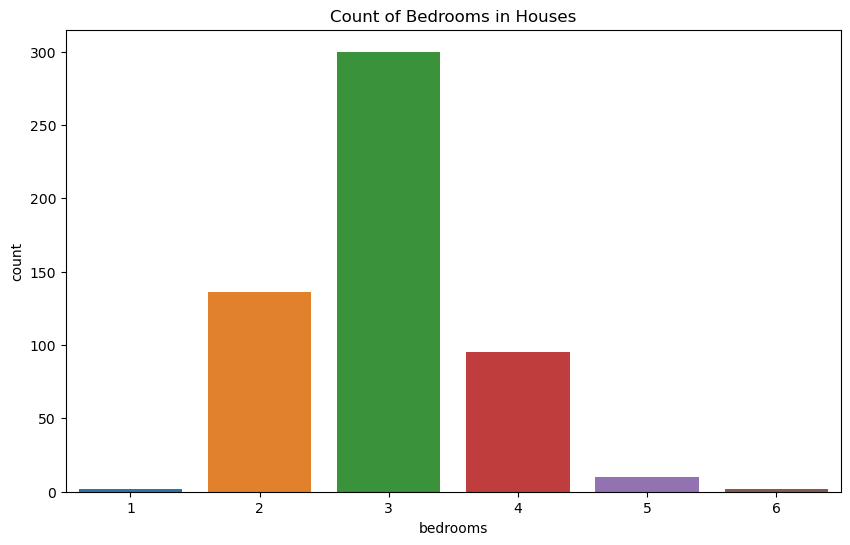

In [32]:
# Count plot for number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x=housing_data['bedrooms'])
plt.title('Count of Bedrooms in Houses')
plt.show()

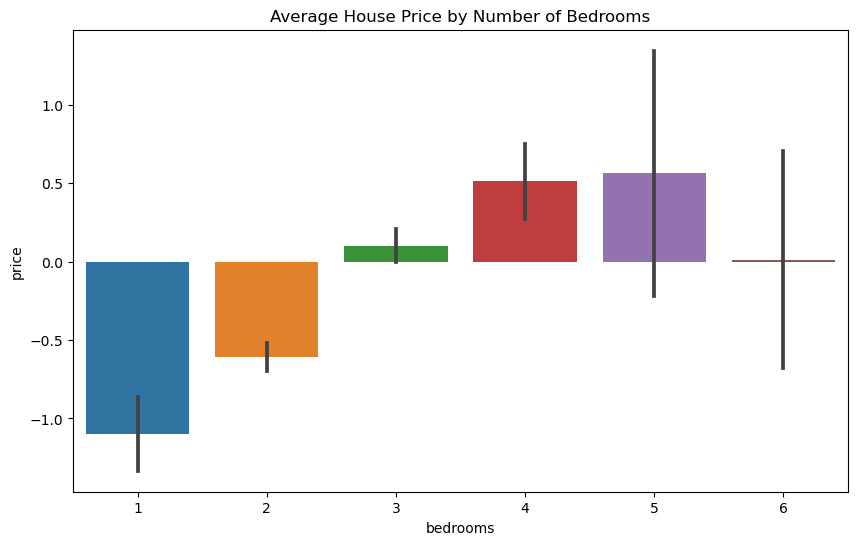

In [33]:
# Average price per number of bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=housing_data)
plt.title('Average House Price by Number of Bedrooms')
plt.show()

#### 4. Project Deliverables and Progress

**4.1 Data Collection and Pre-processing**

**Completed:** All key variables have been identified and pre-processed, including transformations for categorical variables and normalization of numerical features.

**4.2 Data Visualization and Analysis**

**Completed:** Data visualizations were created to illustrate key relationships between price, area, number of bedrooms, and other factors.

**Ongoing:** Further in-depth analysis on the influence of other amenities and neighborhood characteristics is in progress.

**4.3 Advanced Modeling (Next Steps)**

**Predictive Modeling:** The next phase will involve building predictive models (e.g., linear regression, decision trees) to forecast housing prices based on the key variables identified.

**Scenario Analysis:** Additionally, scenario analyses will be conducted to assess how changes in features (e.g., adding bedrooms or amenities) might affect property prices.

#### Conclusion and Business Insights

**This analysis provides key insights into the real estate market:**

**Size and Location** are the two most significant factors influencing property prices, making them critical for buyers, sellers, and investors.

**Premium Amenities** and **Furnishing Status** can increase property values and attract higher bids, offering a clear path for sellers looking to enhance their properties.

**Luxury Market Potential:** The presence of high-priced outliers suggests that there is room for growth in the luxury property segment, particularly in prime areas with large, well-equipped homes.

These findings offer a clear framework for informed real estate investment and development strategies, helping stakeholders to maximize returns in an evolving market.

Trello Board: https://trello.com/b/TZ8GhWxy/workplace-module

repo: https://github.com/tshifurakm/Workplace-Module